# **Fase 2**

1. Revisa:
    * Los conceptos generales de los lenguajes de programación y sus enfoques hacia a la inteligencia artificial.
    * El funcionamiento de los diccionarios y conjuntos en Python.
    * La forma de declarar funciones y combinarlas con las estructuras de control en Python.
    * La instalación y uso de las librerías NumPy, Pandas y Matplotlib en Python.
2. Agrupa los datos recopilados en un fichero tipo texto que pueda ser importado a Python, de preferencia “csv” (Comma Separated Values) o “xlsx” (Microsoft Excel Spreadsheet as Data Charts).
3. Prepara tu entorno de trabajo en Jupyter Notebook dentro de la plataforma IBM Cloud, puedes apoyarte en la guía compartida en el anexo 1.
4. Importa el fichero de datos al entorno de trabajo y realiza las siguientes operaciones:
   * Importa las librerías NumPy, Pandas y Matplotlib a tu notebook.
   * Genera un Dataframe con los datos incluidos en el fichero de datos obtenido en el punto 2.
   * Organiza la información dentro de Dataframe de la forma que mejor se adecue a la problemática que se desea analizar, modifica el tipo de variable en caso de ser necesario.
   * Aplica una función matemática que te permita sintetizar parte de los datos dentro del Dataframe.
   * Selecciona una muestra de los datos y representa gráficamente la información que aportan.
5. Elabora un resumen de la información relevante obtenida, presenta tus conclusiones en un documento electrónico.

In [1]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


- Importar fichero de datos. Este fichero actualmente tiene los datos de clima generados por el servicio AccuWeather.
Los datos han sido tomados usando su [api gratuita](https://developer.accuweather.com/) y se han guardado en intervalos de media hora.
- Los datos recopilados corresponden a los del estado de Aguascalientes, México entre las fechas del 12 de Octubre de 2021 y 14 de Noviembre de 2021.
- Los datos continúan recopilándose actualmente.

In [2]:
# Importar fichero de datos y crear Dataframe
# A la vez de importar los datos se seleccionan solo las columnas que se requieren para el análisis.
# Para este caso serán las columnas de Temperatura Farenheit (Temperature(F)), si hubo lluvia (HasPrecipitation)
# y Humedad relativa (RelativeHumidity).
# Con esto se cubre generar el dataframe y organizar la información.
columnas_elegidas = ['Temperature(F)', 'HasPrecipitation', 'RelativeHumidity']
datos_clima = pd.read_csv('datos_clima.csv', usecols=columnas_elegidas)
print(datos_clima.head())

   HasPrecipitation  Temperature(F)  RelativeHumidity
0             False            78.0                39
1             False            78.0                39
2             False            80.0                37
3             False            80.0                36
4             False            80.0                36


- Se ha elegido la columna de temperatura Ferenheit para poder cubrir el punto de aplicar la función matemática.
- Se aplicará una función para convertir la temperatura de Farenheit a Celsius.

In [3]:
# Convertir grados Farenheit a Celsius
datos_clima['Temperature(C)'] = round(((datos_clima['Temperature(F)'] - 32) * 5/9), 1)
print(datos_clima.head())

   HasPrecipitation  Temperature(F)  RelativeHumidity  Temperature(C)
0             False            78.0                39            25.6
1             False            78.0                39            25.6
2             False            80.0                37            26.7
3             False            80.0                36            26.7
4             False            80.0                36            26.7


- Generación de la gráfica representando la información de temperatura en Celsius, humedad relativa y si hubo lluvia.

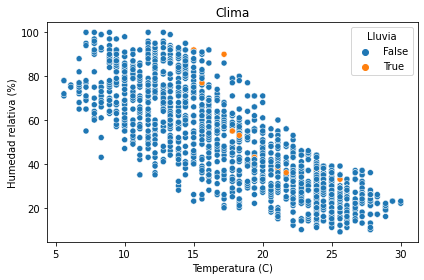

In [33]:
grafica = sns.scatterplot(x='Temperature(C)', y='RelativeHumidity', hue="HasPrecipitation", legend="full", data=datos_clima)
plt.xlabel('Temperatura (C)')
plt.ylabel('Humedad relativa (%)')
grafica.legend(title='Lluvia')
plt.title('Clima')
plt.tight_layout()
plt.show(grafica)

Revisando la gráfica generada podemos ver que es probable que la relación de precipitación sea inversa entre la humedad relativa y temperatura. A mayor temperatura y menor humedad relativa, mayor probabilidad de lluvia y a menor temperatura y mayor humedad relativa, mayor probabilidad de lluvia entre los rangos de $15^o C $ y $30^o C$.
